### Import Modules

In [2]:
# Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

sns.set()

%matplotlib inline

### Load Data

In [4]:
# dataset url from UCI Machine Learning Repository
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df_census = pd.read_csv(data_url, header=None)

In [5]:
# Display first 5 rows
df_census.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Define df_census columns
df_census.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income']

# Display first 5 rows
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Display df_census info
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Drop education column
df_census = df_census.drop(['education'], axis=1)

In [9]:
# Convert non-numeric columns using get_dummies
df_census = pd.get_dummies(df_census)

# Display first 5 rows
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Drop column 'income_ <=50K'
df_census = df_census.drop('income_ <=50K', axis=1)

In [11]:
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import re

def trim_columns(text):
    text = re.sub(r'[/&!?.:;,"()-]',"_",text)
    
    return text
    
df_census.columns = list(map(str.lower,df_census.columns.tolist()))
df_census.columns = list(map(lambda text: text.replace(" ","_"),df_census.columns.tolist()))
df_census.columns = list(map(lambda ele: trim_columns(ele), df_census.columns.tolist()))

In [13]:
df_census.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass___,workclass__federal_gov,workclass__local_gov,workclass__never_worked,...,native_country__puerto_rico,native_country__scotland,native_country__south,native_country__taiwan,native_country__thailand,native_country__trinadad_tobago,native_country__united_states,native_country__vietnam,native_country__yugoslavia,income__>50k
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split data

In [14]:
# Split data into X and y
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

### Split Data Train/Test

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### Models: Logistic Regression

In [16]:
# Initialize classifier
lg_reg_model = LogisticRegression()
lg_n_splits=10
# Obtain scores of cross-validation
lg_scores = cross_val_score(lg_reg_model, X, y, cv=lg_n_splits)

# Display accuracy
print('Accuracy:', np.round(lg_scores, 2))

# Display mean accuracy
print('Accuracy mean: %0.2f' % (lg_scores.mean()))

Accuracy: [0.8  0.8  0.79 0.8  0.8  0.81 0.79 0.79 0.8  0.8 ]
Accuracy mean: 0.80


### Models: XGBClassifier

In [17]:
# Initialize classifier
xgb_n_estimators = 5
xgb_model = XGBClassifier(n_estimators=xgb_n_estimators)

xgb_n_splits=10

# Obtain scores of cross-validation
xgb_scores = cross_val_score(xgb_model, X, y, cv=xgb_n_splits)

# Display accuracy
print('Accuracy:', np.round(xgb_scores, 2))

# Display mean accuracy
print('Accuracy mean: %0.2f' % (xgb_scores.mean()))

Accuracy: [0.85 0.86 0.87 0.85 0.86 0.86 0.86 0.87 0.86 0.86]
Accuracy mean: 0.86


### Models: Decision Tree Classifier

In [18]:
# random state, to gurantee the same result in every run
dt_rand_state = 2

# decision tree classifier instance
dt_model = DecisionTreeClassifier(random_state=dt_rand_state)

# fed the model taining data
dt_model.fit(X_train, y_train)

# Make predictions for test data
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.8131679154894976

### Model: Random Forest Classifier

In [19]:
# params 
rf_rand_state = 2 
rf_n_estimators = 10
rf_n_jobs = -1

# Initialize the classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

# Obtain scores of cross-validation
rf_scores = cross_val_score(rf_model, X, y, cv=5)

# Display accuracy
print('Accuracy:', np.round(rf_scores, 3))

# Display mean accuracy
print('Accuracy mean: %0.3f' % (rf_scores.mean()))



Accuracy: [0.851 0.844 0.851 0.852 0.851]
Accuracy mean: 0.850


### Random Forest Hyperparameters

In [20]:
# Intialize Random Forest Classifier with oob_score=True
rf_model = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rf_model.fit(X, y)

RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=2)

In [21]:
# Display oob score
rf_model.oob_score_

0.8343109855348423

In [22]:
# Intialize Random Forest Classifier with n_estimators=50 and oob_score=True
rf_model = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rf_model.fit(X, y)

# Display oob_score
rf_model.oob_score_

0.8518780135745216

In [23]:
# Intialize Random Forest Classifier with n_estimators=50 and oob_score=True
rf_model = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rf_model.fit(X, y)

# Display oob_score
rf_model.oob_score_


0.8574675224962378

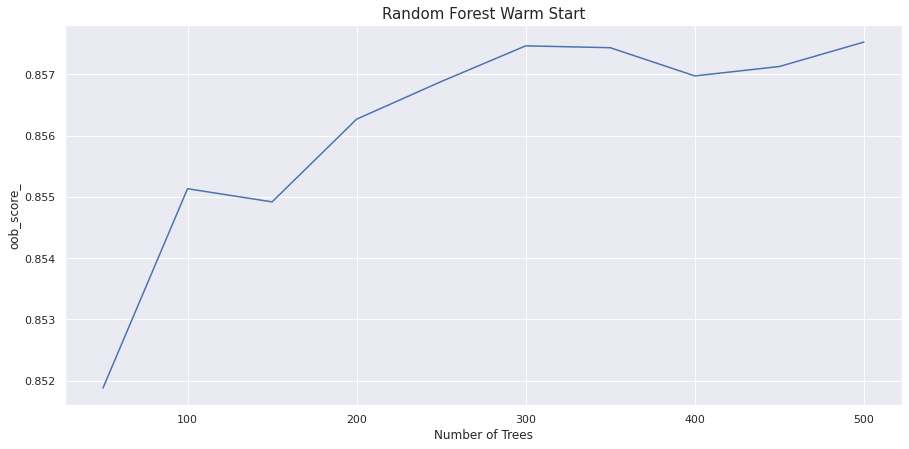

In [24]:
# Intialize empty list of oob_scores
oob_scores = []

# Initalize Random Forest as rf with 50 estimators, warm_start=True, and oob_score=True
rf_model = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=2)

# Fit rf to Census dataset
rf_model.fit(X, y)

# Append rf_oob_score to oob_scores list
oob_scores.append(rf_model.oob_score_)

# Initalize est to 50
est = 50

# Initalize estimtators list with est
estimators=[est]

# Use for loop from 0 -9 
for i in range(9):
    
    # Add 50 to est
    est += 50
    
    # Append est to estimators list
    estimators.append(est)

    # Set n_estimators to est
    rf_model.set_params(n_estimators=est)
    
    # Fit rf on Census dataset
    rf_model.fit(X, y)
    
    # Append rf_oob_score to oob_scores list
    oob_scores.append(rf_model.oob_score_)

# Set size of display
plt.figure(figsize=(15,7))

# Plot estimators and oob_scores
plt.plot(estimators, oob_scores)

# Set x label
plt.xlabel('Number of Trees')

# Set y label
plt.ylabel('oob_score_')

# Display title
plt.title('Random Forest Warm Start', fontsize=15)

# Save graph
plt.savefig('Random_Forest_Warm_Start', dpi=325)

# Show graph
plt.show()


### Export Random Forest Model

In [26]:
model_loc = "../census_classification/no_batch/app/census.pkl"
pickle.dump(rf_model, open(model_loc,"wb"))

### Export BaseModel attributes

In [ ]:
fieldf_census = df_census.columns.tolist()
dtypes_lst = list(map(str,df_census.dtypes.to_list()))

for i in range(len(fields)):
    print("{0}: {1}".format(fields[i],dtypes_lst[i]))

In [ ]:
import json

rf_json_reocrds = X_test.sample(3).to_json(orient="records")
rf_parsed_records = json.loads(rf_json_reocrds)

rf_js = json.dumps(rf_parsed_records, indent=4)

with open("../census_classification/census-examples/test.json", "w") as rf_file:
    rf_file.write(rf_js)
    
    

In [29]:
rf_json_batches = X_test.sample(20).values

In [35]:
print("{ batches: ")
print(rf_json_batches.tolist())
print("}")

{ batches: 
[[43, 410867, 16, 0, 0, 50, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [32, 186824, 9, 0, 0, 40, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [52, 246197, 9, 0, 0, 40, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [43, 209544, 14, 10520, 0, 50, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0

In [31]:
len(X_train.columns)

92